# Aus einem Disaster lernen

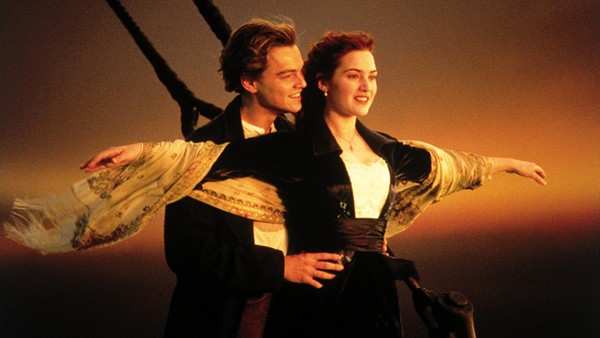

<i><FONT SIZE ="2"><sup>1</sup>Vgl. Titanic Movie, im Internet unter: www.metrotimes.com
            </i></i>

<i><FONT SIZE ="2"><sup>2</sup>Vgl. Titanic Dataset, im Internet unter: https://www.kaggle.com/c/titanic/data
            </i></i> 

<br><br><br><br><br>
# Den Datensatz laden und betrachten

In [30]:
import pandas as pd  #Paket für Datenverarbeitung
import numpy as np #""

titanic_tr = "/Users/daniellazarev/Desktop/Titanic/train.csv" #der Pfad sollte angepasst werden
df = pd.read_csv(titanic_tr, header = 0)

<p class="justify"><FONT FACE="Arial"><FONT SIZE ="3"><p style="line-height:1.5 %;margin-right:2cm;"> Übersicht über den Datensatz gewinnen.

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<br><br><br><br><br>
# Vorbereitung der Daten

<p class="justify"><FONT FACE="Arial"><FONT SIZE ="3"><p style="line-height:1.5 %;margin-right:2cm;"> Trennung der Target-Variable von dem Rest der Daten

In [32]:
X = df.drop("Survived",1) #Inputvariablen
Y = df.Survived #Outputvariable

<p class="justify"><FONT FACE="Arial"><FONT SIZE ="3"><p style="line-height:1.5 %;margin-right:2cm;"> 
Entfernen weiterer nicht aussagekräftiger Daten

In [33]:
X = X.drop("Name",1) #unrelevant
X = X.drop("Ticket",1) #Ticket Nummer nicht gruppierbar
X = X.drop("Cabin",1) #zu viele NaN
X = X.drop("PassengerId",1) #unrelevant

<p class="justify"><FONT FACE="Arial"><FONT SIZE ="3"><p style="line-height:1.5 %;margin-right:2cm;">
    So sieht der neue Datensatz aus.

In [34]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


<p class="justify"><FONT FACE="Arial"><FONT SIZE ="3"><p style="line-height:1.5 %;margin-right:2cm;">Um nachfoldend ein besseres Verständnis zu gewährleisten, werden die Variablen übersetzt.

In [35]:
X = X.rename(columns ={"Pclass": "Reiseklasse", "Age":"Alter", "SibSp": "Mitreisende_Partner",
                   "Parch":"Anzahl_Kinder_Eltern","Fare":"Ticketpreis","Embarked":"Einstiegshafen"})

<br><br><br><br><br><br>
<p class="justify"><FONT FACE="Arial"><FONT SIZE ="3"><p style="line-height:1.5 %;margin-right:2cm;"> Hier wird die Codierung betrachtet und auf Verwertbarkeit analysiert.<br>

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Reiseklasse             891 non-null int64
Sex                     891 non-null object
Alter                   714 non-null float64
Mitreisende_Partner     891 non-null int64
Anzahl_Kinder_Eltern    891 non-null int64
Ticketpreis             891 non-null float64
Einstiegshafen          889 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 48.8+ KB


<p class="justify"><FONT FACE="Arial"><FONT SIZE ="3"><p style="line-height:1.5 %;margin-right:2cm;"> Object Variablen sind für unsere Aufgabe nicht verwertbar. Python erkennt nicht, dass die Ausprägung "male" bei dem Passagier Nr. 1 die gleiche ist wie bei dem Passagier Nr. 4. Der Wert wird individuell betrachtet. Die Variable wird so umcodiert, dass diese nun zwei Kategorien aufweist "male" und "female".

In [37]:
cat_cols = X.dtypes.pipe(lambda x: x[x == "object"]).index
for i in cat_cols:                               #Funktion für autom. Umcodierung der object Var.
    X[i] = X[i].astype("category")

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Reiseklasse             891 non-null int64
Sex                     891 non-null category
Alter                   714 non-null float64
Mitreisende_Partner     891 non-null int64
Anzahl_Kinder_Eltern    891 non-null int64
Ticketpreis             891 non-null float64
Einstiegshafen          889 non-null category
dtypes: category(2), float64(2), int64(3)
memory usage: 36.8 KB


<br><br><br><br><br><br>
<p class="justify"><FONT FACE="Arial"><FONT SIZE ="3"><p style="line-height:1.5 %;margin-right:2cm;"> Die "Not a Number-Werte" im Datensatz werden durch den Mittelwert ersetzt.

In [39]:
X= X.fillna(X.mean())

<p class="justify"><FONT FACE="Arial"><FONT SIZE ="3"><p style="line-height:1.5 %;margin-right:2cm;"> Der Algorithmus weiß nicht mit Kategorien innerhalb einer Variable umzugehen. Siehe Variable Reiseklass "Pclass" mit der Ausprägung = "1,2,3". Diese Variable wird in eine so genannte Dummyvariable codiert. Somit repräsentiert jede Ausprägung eine eigene Variable.

In [41]:
Reiseklassen = [1,2,3]  # Umcodierung "mon" = 1 etc.
Reiseklassen_new = ["erste_klasse","zweite_klasse","dritte_klasse"]
X.Reiseklasse = X.Reiseklasse.replace(Reiseklassen,Reiseklassen_new)

In [42]:
X = pd.get_dummies(X) ######hier noch Reiseklasse umcodieren neben anderen Dummies

In [43]:
X.head()

,Alter,Mitreisende_Partner,Anzahl_Kinder_Eltern,Ticketpreis,Reiseklasse_dritte_klasse,Reiseklasse_erste_klasse,Reiseklasse_zweite_klasse,Sex_female,Sex_male,Einstiegshafen_C,Einstiegshafen_Q,Einstiegshafen_S
0,22.0,1,0,7.2500,1,0,0,0,1,0,0,1
1,38.0,1,0,71.2833,0,1,0,1,0,1,0,0
2,26.0,0,0,7.9250,1,0,0,1,0,0,0,1
3,35.0,1,0,53.1000,0,1,0,1,0,0,0,1
4,35.0,0,0,8.0500,1,0,0,0,1,0,0,1


In [44]:
X = X.drop("Sex_male",1)

In [45]:
X.head()

,Alter,Mitreisende_Partner,Anzahl_Kinder_Eltern,Ticketpreis,Reiseklasse_dritte_klasse,Reiseklasse_erste_klasse,Reiseklasse_zweite_klasse,Sex_female,Einstiegshafen_C,Einstiegshafen_Q,Einstiegshafen_S
0,22.0,1,0,7.2500,1,0,0,0,0,0,1
1,38.0,1,0,71.2833,0,1,0,1,1,0,0
2,26.0,0,0,7.9250,1,0,0,1,0,0,1
3,35.0,1,0,53.1000,0,1,0,1,0,0,1
4,35.0,0,0,8.0500,1,0,0,0,0,0,1


<br></br><br></br><br></br><br></br>
# Modell trainieren und evaluieren

<p class="justify"><FONT FACE="Arial"><FONT SIZE ="3"><p style="line-height:1.5 %;margin-right:2cm;"> Package import und Aufteilung der Daten in Trainings- und Testdaten.

In [79]:
from sklearn.tree import DecisionTreeClassifier #Paket mit dem Algorithmus
from sklearn import tree
from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.3, 
                                                   stratify=Y, 
                                                   random_state=0) #Aufteilung


In [47]:
from IPython.display import SVG
from graphviz import Source
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from ipywidgets import interactive
from IPython.display import display 

In [48]:
dt = DecisionTreeClassifier()

In [49]:
labels = X_train.columns

<p class="justify"><FONT FACE="Arial"><FONT SIZE ="3"><p style="line-height:1.5 %;margin-right:2cm;"> Erstellung einer Funktion für interaktive Plots.

In [76]:
def plot_tree(crit, depth,  min_leaf=0.17): 
    dt = DecisionTreeClassifier(random_state = 123
                              , criterion = crit
                              , max_depth = depth
                              , min_samples_leaf=min_leaf)
    
    dt.fit(X_train, Y_train)
    graph = Source(tree.export_graphviz(dt, out_file=None, 
                                        feature_names=labels, 
                                        class_names=['0', '1', '2'], 
                                        filled = True))
    
    display(SVG(graph.pipe(format='svg')))
return dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<br></br><br></br><br></br><br></br>
# Auswertung

<p class="justify"><FONT FACE="Arial"><FONT SIZE ="3"><p style="line-height:1.5 %;margin-right:2cm;"> Wieviele Überlebende befinden sich in den Trainingsdaten? 

In [77]:
Y_train.value_counts()

0    384
1    239
Name: Survived, dtype: int64

In [78]:
decision_plot = interactive(plot_tree, crit = ["gini", "entropy"],  
                            depth=[1, 2, 3, 4, 5, 6, 7,8,10],  
                            min_leaf=[10,20,30,40,50,60,70,80])

display(decision_plot)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

<p class="justify"><FONT FACE="Arial"><FONT SIZE ="3"><p style="line-height:1.5 %;margin-right:2cm;">Wie gut ist das Ergebnis. Kann das Modell die Überlebenden erkennen und richtig vorhersagen?

In [71]:
dt_new = DecisionTreeClassifier(max_depth=10,criterion = "gini",
                            random_state = 0, min_samples_leaf=60)
dt_new.fit(X_train,Y_train)

Y_pred =  dt_new.predict_proba(X_test)[:,1] #Wahrscheinlichketeiten 
Y_pred_train = dt_new.predict_proba(X_train)[:,1] #"" zur Prüfung auf Overfitting

<p class="justify"><FONT FACE="Arial"><FONT SIZE ="3"><p style="line-height:1.5 %;margin-right:2cm;">Erstellung einer ROC-AUC Kurve. Die Darstellung ist ein gängiges Maß zur Ermittlung der Modellgüte.

Text(0.5, 0, 'FPR')

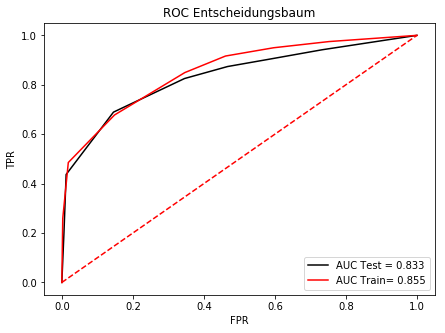

In [72]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

fpr,tpr,_= metrics.roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr,tpr)

#Decision Tree (Test)
fpr1,tpr1,_= metrics.roc_curve(Y_train, Y_pred_train)
roc_auc_train = auc(fpr1,tpr1)

plt.figure(figsize=(7,5)) 
plt.title("ROC Entscheidungsbaum")
plt.plot(fpr,tpr,"black", label = "AUC Test = %0.3f"% roc_auc)
plt.plot(fpr1,tpr1,"r", label = "AUC Train= %0.3f"% roc_auc_train)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],"r--")
plt.ylabel("TPR")
plt.xlabel("FPR")



<br><br><br><br><br><br>
<p class="justify"><FONT FACE="Arial"><FONT SIZE ="3"><p style="line-height:1.5 %;margin-right:2cm;">Confusion Matrix als Perfomance-Maß. Eine Übersicht über richtige und falsche Klassifikationen.

In [73]:
from sklearn.metrics import confusion_matrix
cmx_dt = confusion_matrix(Y_test,Y_pred>0.5)

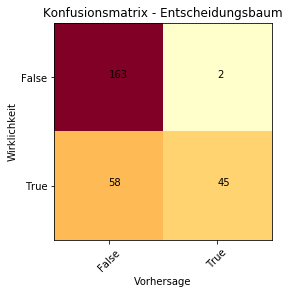

In [74]:
plt.clf() # Plot Cnfusion Matrix
plt.imshow(cmx_dt, interpolation='nearest', cmap="YlOrRd")
classNames = ['False','True']
plt.title('Konfusionsmatrix - Entscheidungsbaum')
plt.ylabel('Wirklichkeit')
plt.xlabel('Vorhersage')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['',''], ['', '']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+str(cmx_dt[i][j]))
plt.show()  

<br><br><br><br><br><br>
<p class="justify"><FONT FACE="Arial"><FONT SIZE ="3"><p style="line-height:1.5 %;margin-right:2cm;"> Welche Variablen sind wichtig für die Ermittlung der Überlebenden?

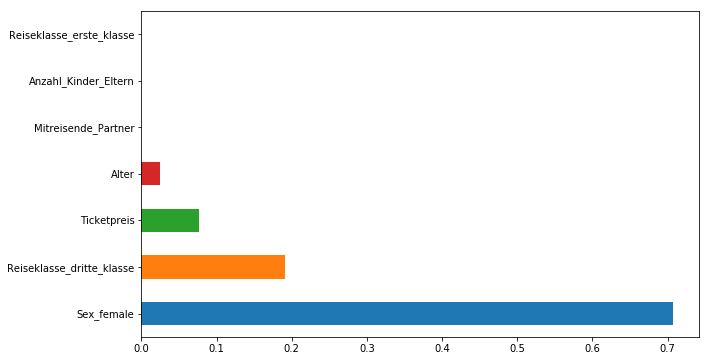

In [75]:
imp = pd.Series(dt_new.feature_importances_,index = X_train.columns)
imp.nlargest(7).plot(kind="barh", figsize=(10,6)) #Balkenddiagramm der wichtigsten 16 Variablen